# Original code for iteration 1, numerical features only

In [2]:
# do the imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

pd.options.display.max_rows = 4000

# from data_cleanup_project_2.ipynb import data_clean_kaggle

//anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [3]:
df_clean = pd.read_csv('../datasets/cleaned_up_data.csv')

In [4]:
df_clean.head()

,Unnamed: 0,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Lot_Shape,Land_Contour,...,Total_Bsmt_SF_missing,Bsmt_Full_Bath_missing,Bsmt_Half_Bath_missing,Garage_Type_missing,Garage_Yr_Blt_missing,Garage_Finish_missing,Garage_Cars_missing,Garage_Area_missing,Garage_Qual_missing,Garage_Cond_missing
0,0,109,533352170,60,RL,0.0,13517,Pave,IR1,Lvl,...,0,0,0,0,0,0,0,0,0,0
1,1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,...,0,0,0,0,0,0,0,0,0,0
2,2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,...,0,0,0,0,0,0,0,0,0,0
3,3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,...,0,0,0,0,0,0,0,0,0,0
4,4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,...,0,0,0,0,0,0,0,0,0,0


(array([122., 760., 609., 288., 147.,  61.,  31.,  16.,   7.,   6.]),
 array([ 34900. ,  92575.7, 150251.4, 207927.1, 265602.8, 323278.5,
        380954.2, 438629.9, 496305.6, 553981.3, 611657. ]),
 <a list of 10 Patch objects>)

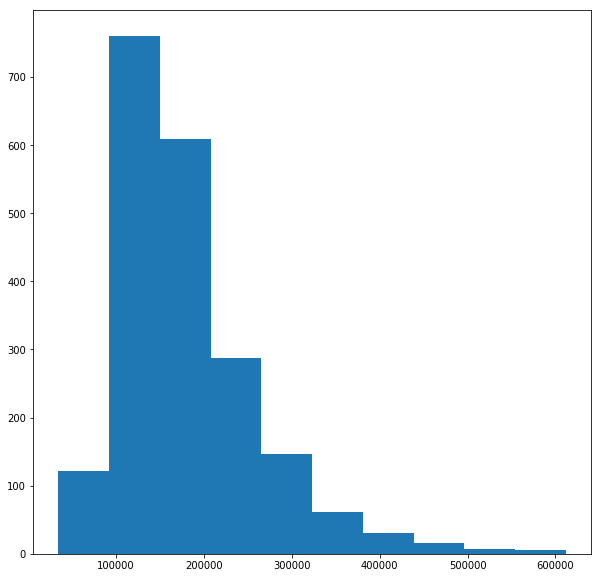

In [5]:
# check if target column is normally distributed or not
plt.figure(figsize=(10,10))
plt.hist(df_clean['SalePrice'])

In [6]:
# add the log sale price                      
df_clean['log_SalePrice'] = np.log(df_clean['SalePrice']) 

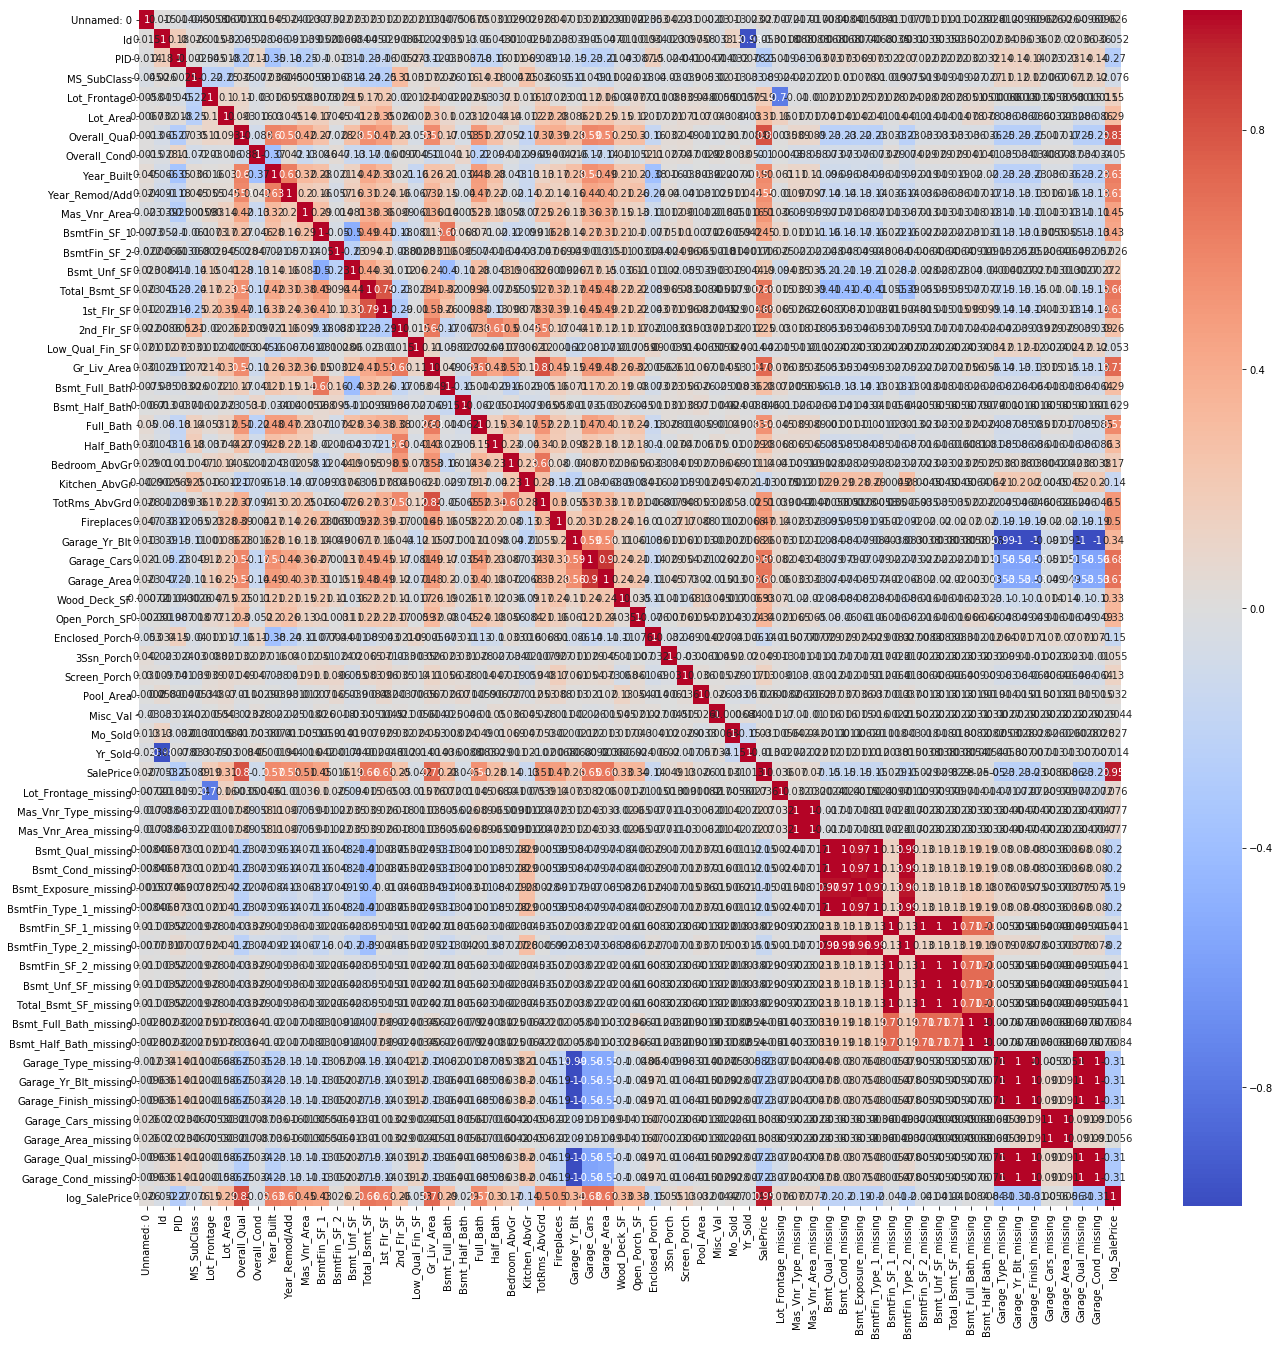

In [7]:
plt.figure(figsize=(22,22))
sns.heatmap(df_clean.corr(), annot= True, cmap='coolwarm')

In [8]:
# Pick for my first features pick those numerical features from the heatmap.  The PARCEL ID might in a round 
#   way indicate what neighborhood it's in.   For the features that came from missing values,  a number of negative
#   correlations came from the no garage and no basement groups,  so i'll just pick one from each.

In [9]:
features = ['PID', 'MS_SubClass','Lot_Frontage','Lot_Area','Overall_Qual','Overall_Cond','Year_Built', 
            'Year_Remod/Add','Mas_Vnr_Area','BsmtFin_SF_1','Total_Bsmt_SF','1st_Flr_SF','2nd_Flr_SF', 'Gr_Liv_Area',
            'Bsmt_Full_Bath','Full_Bath', 'Half_Bath','Bedroom_AbvGr','TotRms_AbvGrd', 'Fireplaces','Garage_Yr_Blt',
            'Garage_Cars', 'Garage_Area', 'Wood_Deck_SF', 'Open_Porch_SF','Enclosed_Porch','Bsmt_Qual_missing',
            'Garage_Type_missing']
    
    

In [10]:
len(features)

28

In [11]:
df = df_clean[features]

In [12]:
df.head()

,PID,MS_SubClass,Lot_Frontage,Lot_Area,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Mas_Vnr_Area,BsmtFin_SF_1,...,TotRms_AbvGrd,Fireplaces,Garage_Yr_Blt,Garage_Cars,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,Bsmt_Qual_missing,Garage_Type_missing
0,533352170,60,0.0,13517,6,8,1976,2005,289.0,533.0,...,6,0,1976.0,2.0,475.0,0,44,0,0,0
1,531379050,60,43.0,11492,7,5,1996,1997,132.0,637.0,...,8,1,1997.0,2.0,559.0,0,74,0,0,0
2,535304180,20,68.0,7922,5,7,1953,2007,0.0,731.0,...,5,0,1953.0,1.0,246.0,0,52,0,0,0
3,916386060,60,73.0,9802,5,5,2006,2007,0.0,0.0,...,7,0,2007.0,2.0,400.0,100,0,0,0,0
4,906425045,50,82.0,14235,6,8,1900,1993,0.0,0.0,...,6,0,1957.0,2.0,484.0,0,59,0,0,0


In [13]:
# do preprocessing 
X = df
y = df_clean['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [14]:
# do the modeling
lr = LinearRegression()
lr.fit(X_train_sc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_train_hat = lr.predict(X_train_sc)

In [15]:
# check the metrics
RMSE = np.sqrt(mean_squared_error(y_train, y_train_hat))
RMSE

27439.29322756046

In [16]:
lr.score(X_train_sc, y_train)

0.8791796475457775

In [17]:
lr.score(X_test_sc, y_test)

0.8675111259264398

In [18]:
cross_val_score(lr, X_train_sc, y_train, cv= 5).mean()

0.8681709546645422

In [19]:
# submit to kaggle
df_kaggle = pd.read_csv('../datasets/test.csv')

In [20]:
def data_clean_kaggle(df):
    temp = []
    for col_name in df.columns:
        temp.append(col_name.replace(' ', '_'))
    df.columns = temp
    
    df['Lot_Frontage_missing'] = df['Lot_Frontage'].isnull().apply(lambda x: 1 if x == True else 0)
    df['Lot_Frontage'].fillna(0, inplace= True)
    
    df['Mas_Vnr_Area_missing'] = df['Mas_Vnr_Area'].isnull().apply(lambda x: 1 if x == True else 0)
    df['Mas_Vnr_Area'].fillna(0, inplace= True)
                                                       
    df['BsmtFin_SF_1_missing'] = df['BsmtFin_SF_1'].isnull().apply(lambda x: 1 if x == True else 0)
    df['BsmtFin_SF_1'].fillna(0, inplace= True)
                                                        
    df['Total_Bsmt_SF_missing'] = df['Total_Bsmt_SF'].isnull().apply(lambda x: 1 if x == True else 0)
    df['Total_Bsmt_SF'].fillna(0, inplace= True)
                              
    df['Bsmt_Full_Bath_missing'] = df['Bsmt_Full_Bath'].isnull().apply(lambda x: 1 if x == True else 0)
    df['Bsmt_Full_Bath'].fillna(0, inplace= True)
                              
    df['Garage_Yr_Blt_missing'] = df['Garage_Yr_Blt'].isnull().apply(lambda x: 1 if x == True else 0)
    df['Garage_Yr_Blt'].fillna(0, inplace= True) 
                              
    df['Garage_Cars_missing'] = df['Garage_Cars'].isnull().apply(lambda x: 1 if x == True else 0)
    df['Garage_Cars'].fillna(0, inplace= True) 
                              
    df['Garage_Area_missing'] = df['Garage_Area'].isnull().apply(lambda x: 1 if x == True else 0)
    df['Garage_Area'].fillna(0, inplace= True)
                              
                            
    df['Bsmt_Qual_missing'] = df['Bsmt_Qual'].isnull().apply(lambda x: 1 if x == True else 0)
    df['Bsmt_Qual'].fillna('NA', inplace= True)
    
    df['Garage_Type_missing'] = df['Garage_Type'].isnull().apply(lambda x: 1 if x == True else 0)
    df['Garage_Type'].fillna('NA', inplace= True) 
    
     
    
    return df

In [21]:
# submit to kaggle
df_kaggle = pd.read_csv('../datasets/test.csv')

In [22]:
def data_clean_kaggle(df):
    temp = []
    for col_name in df.columns:
        temp.append(col_name.replace(' ', '_'))
    df.columns = temp
    
    df['Lot_Frontage_missing'] = df['Lot_Frontage'].isnull().apply(lambda x: 1 if x == True else 0)
    df['Lot_Frontage'].fillna(0, inplace= True)
    
    df['Mas_Vnr_Area_missing'] = df['Mas_Vnr_Area'].isnull().apply(lambda x: 1 if x == True else 0)
    df['Mas_Vnr_Area'].fillna(0, inplace= True)
                                                       
    df['BsmtFin_SF_1_missing'] = df['BsmtFin_SF_1'].isnull().apply(lambda x: 1 if x == True else 0)
    df['BsmtFin_SF_1'].fillna(0, inplace= True)
                                                        
    df['Total_Bsmt_SF_missing'] = df['Total_Bsmt_SF'].isnull().apply(lambda x: 1 if x == True else 0)
    df['Total_Bsmt_SF'].fillna(0, inplace= True)
                              
    df['Bsmt_Full_Bath_missing'] = df['Bsmt_Full_Bath'].isnull().apply(lambda x: 1 if x == True else 0)
    df['Bsmt_Full_Bath'].fillna(0, inplace= True)
                              
    df['Garage_Yr_Blt_missing'] = df['Garage_Yr_Blt'].isnull().apply(lambda x: 1 if x == True else 0)
    df['Garage_Yr_Blt'].fillna(0, inplace= True) 
                              
    df['Garage_Cars_missing'] = df['Garage_Cars'].isnull().apply(lambda x: 1 if x == True else 0)
    df['Garage_Cars'].fillna(0, inplace= True) 
                              
    df['Garage_Area_missing'] = df['Garage_Area'].isnull().apply(lambda x: 1 if x == True else 0)
    df['Garage_Area'].fillna(0, inplace= True)
                              
                            
    df['Bsmt_Qual_missing'] = df['Bsmt_Qual'].isnull().apply(lambda x: 1 if x == True else 0)
    df['Bsmt_Qual'].fillna('NA', inplace= True)
    
    df['Garage_Type_missing'] = df['Garage_Type'].isnull().apply(lambda x: 1 if x == True else 0)
    df['Garage_Type'].fillna('NA', inplace= True) 
    
     
    
    return df

In [23]:
df_kaggle = data_clean_kaggle(df_kaggle)

X_kaggle = df_kaggle[features]

y_kaggle_hat = lr.predict(X_kaggle)

In [24]:
id_list = list(df_kaggle['Id'])
sale_price_list = list(y_kaggle_hat)

df_submission = pd.DataFrame(list(zip(id_list, sale_price_list)),
                                 columns= ['Id', 'SalePrice'])

df_submission.to_csv('../datasets/iter_1_submission.csv', index= False)

In [25]:
# run OLS primarily as a features filter 
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              2525.
Date:                Wed, 02 Oct 2019   Prob (F-statistic):                        0.00
Time:                        21:51:32   Log-Likelihood:                         -17932.
No. Observations:                1535   AIC:                                  3.592e+04
Df Residuals:                    1507   BIC:                                  3.607e+04
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
PID                 -6.833e-06   4.32e-06     -1.582      0.114   -1.53e-05    1.64e-06
MS_SubClass          -115.5448     20.071     -5.757      0.000    -154.916     -76.174
Lot_Frontage          107.7332     23.811      4.525      0.000      61.027     154.439
Lot_Area                0.5550      0.130      4.280      0.000       0.301       0.809
Overall_Qual         1.928e+04    859.039     22.439      0.000    1.76e+04     2.1e+04
Overall_Cond         4195.6386    835.475      5.022      0.000    2556.821    5834.457
Year_Built             78.4214     43.492      1.803      0.072      -6.890     163.733
Year_Remod/Add       -110.7712     43.233     -2.562      0.010    -195.575     -25.968
Mas_Vnr_Area           27.7191      5.019      5.523      0.000      17.874      37.565
BsmtFin_SF_1           21.6185      2.518      8.586      0.000      16.680      26.557
Total_Bsmt_SF          36.3518      4.072      8.927      0.000      28.364      44.340
1st_Flr_SF             33.9526     15.078      2.252      0.024       4.377      63.529
2nd_Flr_SF             46.5454     14.747      3.156      0.002      17.619      75.472
Gr_Liv_Area             9.0027     14.681      0.613      0.540     -19.794      37.800
Bsmt_Full_Bath       3439.4779   1916.065      1.795      0.073    -318.959    7197.914
Full_Bath            5484.0695   2044.064      2.683      0.007    1474.558    9493.581
Half_Bath            5281.4951   2148.038      2.459      0.014    1068.033    9494.957
Bedroom_AbvGr       -1.196e+04   1359.764     -8.798      0.000   -1.46e+04   -9295.617
TotRms_AbvGrd        2992.9423    961.045      3.114      0.002    1107.815    4878.070
Fireplaces           2556.2965   1429.558      1.788      0.074    -247.838    5360.431
Garage_Yr_Blt         -19.9720     14.567     -1.371      0.171     -48.546       8.602
Garage_Cars          2732.1035   2490.944      1.097      0.273   -2153.981    7618.188
Garage_Area            38.9513      8.581      4.539      0.000      22.119      55.784
Wood_Deck_SF           17.9278      6.601      2.716      0.007       4.980      30.875
Open_Porch_SF          26.8849     12.315      2.183      0.029       2.728      51.042
Enclosed_Porch        -30.1127     13.425     -2.243      0.025     -56.447      -3.779
Bsmt_Qual_missing    3.401e+04   6304.060      5.395      0.000    2.16e+04    4.64e+04
Garage_Type_missing -1.772e+04   2.84e+04     -0.624      0.533   -7.34e+04     3.8e+04
==============================================================================
Omnibus:                      305.626   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3681.667
Skew:              

In [26]:
# run OLS primarily as a features filter 
model = sm.OLS(y_train, X_train).fit()
model.summary()

In [27]:
features = ['MS_SubClass','Lot_Frontage','Lot_Area','Overall_Qual','Overall_Cond','Year_Built', 
            'Year_Remod/Add','BsmtFin_SF_1','Total_Bsmt_SF', 'Gr_Liv_Area','Bsmt_Full_Bath',
            'Bedroom_AbvGr','TotRms_AbvGrd', 'Fireplaces','Garage_Area','Enclosed_Porch']

In [28]:
len(features)

16

In [29]:
df = df_clean[features]

X = df
y = df_clean['SalePrice']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)


lr = LinearRegression()
lr.fit(X_train_sc, y_train)

lr.score(X_train_sc, y_train)

0.8699657510585614

In [30]:

y_train_hat = lr.predict(X_train_sc)

RMSE = np.sqrt(mean_squared_error(y_train, y_train_hat))
RMSE

28466.34761456197

In [31]:
lr.score(X_test_sc, y_test)

0.8588924891093839

In [32]:
cross_val_score(lr, X_train_sc, y_train, cv=5).mean()

0.8650108351403365

In [33]:
# the OLS as a filtering device worked well;  r squares remained about the same with the smaller feature set

In [34]:
# save this iteration 1 chosen feature's df
df.to_csv('../datasets/iter_1_df.csv')